In [22]:
import numpy
import pandas as pd
import seaborn as sns
import sklearn as scikit_learn

In [23]:
############
df_ludnosc = pd.read_csv("../data/ludnosc.csv", sep=";")
df_gminy = pd.read_csv("../data/gminy.csv", sep=";")

/Users/gsochaj/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
df_ludnosc

,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
0,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,1999,31428,gosp.,NaN,NaN
1,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2000,36163,gosp.,NaN,NaN
2,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2001,31847,gosp.,NaN,NaN
3,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2002,32342,gosp.,NaN,NaN
4,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2003,32452,gosp.,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25869,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2016,"19,9",%,NaN,NaN
25870,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2017,"19,5",%,NaN,NaN
25871,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2018,"19,5",%,NaN,NaN
25872,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2019,"19,3",%,NaN,NaN


In [25]:
df_ludnosc1 = df_ludnosc[(df_ludnosc['Kategoria']== 'Wydatki') & (df_ludnosc['Nazwa'].isin(['MAZOWIECKIE', 'LUBUSKIE',
                                                               'OPOLSKIE','ŚWIĘTOKRZYSKIE',
                                                                                            'KUJAWSKO-POMORSKIE','ŁÓDZKIE']))]
df_ludnosc1 = df_ludnosc1.drop(['Kategoria','Atrybut', 'Unnamed: 8', 'Jednostka miary'], axis=1)
df_ludnosc1

,Kod,Nazwa,Zmienna,Rok,Wartosc
19664,400000,KUJAWSKO-POMORSKIE,ogółem,1998,"440,82"
19665,400000,KUJAWSKO-POMORSKIE,ogółem,1999,"475,92"
19666,400000,KUJAWSKO-POMORSKIE,ogółem,2000,"540,19"
19667,400000,KUJAWSKO-POMORSKIE,ogółem,2001,"572,60"
19668,400000,KUJAWSKO-POMORSKIE,ogółem,2002,"593,50"
...,...,...,...,...,...
24627,2600000,ŚWIĘTOKRZYSKIE,udział wydatków na użytkowanie mieszkania i no...,2016,"20,3"
24628,2600000,ŚWIĘTOKRZYSKIE,udział wydatków na użytkowanie mieszkania i no...,2017,"19,3"
24629,2600000,ŚWIĘTOKRZYSKIE,udział wydatków na użytkowanie mieszkania i no...,2018,"18,5"
24630,2600000,ŚWIĘTOKRZYSKIE,udział wydatków na użytkowanie mieszkania i no...,2019,"18,6"


In [26]:
df_ludnosc1['Wartosc'] = df_ludnosc1['Wartosc'].apply(str).str.replace(',','.').apply(float)
#df_ludnosc1 = df_ludnosc1[df_ludnosc['Kategoria'] == 'Wydatki']

#df_ludnosc = df_ludnosc.drop(['Jednostka miary','Kategoria','Atrybut', 'Unnamed: 8'], axis=1)
#df_ludnosc
#len(df_ludnosc['Zmienna'].unique())
# Pivot z dataframe'u
df_ludnosc_pivot = df_ludnosc1.pivot_table(columns='Zmienna', index=['Kod','Nazwa','Rok'],values='Wartosc')

# Spłaszczenie pivot table
df_ludnosc_pivot_flatten = pd.DataFrame(df_ludnosc_pivot.to_records())
#a = df_ludnosc_pivot_flatten[df_ludnosc_pivot_flatten['Kategoria'] == "Wydatki"]
df_ludnosc_pivot_flatten
#138 rekordów

,Kod,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,ogółem,ogółem (BAEL),pozostałe wydatki na towary i usługi,rekreacja i kultura,...,towary i usługi konsumpcyjne,towary i usługi konsumpcyjne (BAEL),transport,udział wydatków na użytkowanie mieszkania i nośniki energii w wydatkach ogółem,udział wydatków na żywność i napoje bezalkoholowe w wydatkach ogółem,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe
0,400000,KUJAWSKO-POMORSKIE,1998,NaN,NaN,NaN,440.82,NaN,NaN,NaN,...,426.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400000,KUJAWSKO-POMORSKIE,1999,3.93,15.87,26.77,475.92,NaN,24.28,27.88,...,460.59,NaN,31.24,NaN,NaN,95.06,29.99,18.29,13.56,163.65
2,400000,KUJAWSKO-POMORSKIE,2000,7.14,18.04,26.16,540.19,NaN,25.24,32.46,...,521.62,NaN,51.20,NaN,NaN,104.36,28.49,22.42,18.31,173.77
3,400000,KUJAWSKO-POMORSKIE,2001,6.58,20.16,28.47,572.60,NaN,28.40,34.36,...,550.02,NaN,54.64,NaN,NaN,108.89,29.26,23.38,23.41,180.01
4,400000,KUJAWSKO-POMORSKIE,2002,10.15,19.57,29.64,593.50,NaN,26.81,34.83,...,568.30,NaN,51.25,NaN,NaN,123.09,28.72,24.10,25.75,178.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2600000,ŚWIĘTOKRZYSKIE,2016,5.02,18.89,57.80,963.17,NaN,57.50,62.12,...,930.20,NaN,72.60,20.3,27.6,195.53,53.00,60.88,46.91,266.04
134,2600000,ŚWIĘTOKRZYSKIE,2017,7.25,19.97,60.68,1037.06,NaN,72.24,55.85,...,998.54,NaN,83.91,19.3,27.3,200.30,58.40,68.84,49.15,282.86
135,2600000,ŚWIĘTOKRZYSKIE,2018,7.45,23.01,58.92,1075.11,NaN,65.38,55.51,...,1030.85,NaN,107.91,18.5,27.7,199.26,76.93,56.21,34.63,298.18
136,2600000,ŚWIĘTOKRZYSKIE,2019,4.93,22.98,53.27,1059.05,NaN,64.08,49.79,...,1015.24,NaN,92.76,18.6,29.1,197.27,65.25,69.44,46.10,308.59


In [27]:
df_ludnosc_pivot_flatten = df_ludnosc_pivot_flatten.drop(['udział wydatków na użytkowanie mieszkania i nośniki energii w wydatkach ogółem','udział wydatków na żywność i napoje bezalkoholowe w wydatkach ogółem','ogółem','ogółem (BAEL)','towary i usługi konsumpcyjne (BAEL)'], axis =1)
df_ludnosc_pivot_flatten

,Kod,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe
0,400000,KUJAWSKO-POMORSKIE,1998,NaN,NaN,NaN,NaN,NaN,NaN,426.06,NaN,NaN,NaN,NaN,NaN,NaN
1,400000,KUJAWSKO-POMORSKIE,1999,3.93,15.87,26.77,24.28,27.88,7.51,460.59,31.24,95.06,29.99,18.29,13.56,163.65
2,400000,KUJAWSKO-POMORSKIE,2000,7.14,18.04,26.16,25.24,32.46,8.38,521.62,51.20,104.36,28.49,22.42,18.31,173.77
3,400000,KUJAWSKO-POMORSKIE,2001,6.58,20.16,28.47,28.40,34.36,7.04,550.02,54.64,108.89,29.26,23.38,23.41,180.01
4,400000,KUJAWSKO-POMORSKIE,2002,10.15,19.57,29.64,26.81,34.83,10.80,568.30,51.25,123.09,28.72,24.10,25.75,178.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2600000,ŚWIĘTOKRZYSKIE,2016,5.02,18.89,57.80,57.50,62.12,32.21,930.20,72.60,195.53,53.00,60.88,46.91,266.04
134,2600000,ŚWIĘTOKRZYSKIE,2017,7.25,19.97,60.68,72.24,55.85,37.42,998.54,83.91,200.30,58.40,68.84,49.15,282.86
135,2600000,ŚWIĘTOKRZYSKIE,2018,7.45,23.01,58.92,65.38,55.51,46.28,1030.85,107.91,199.26,76.93,56.21,34.63,298.18
136,2600000,ŚWIĘTOKRZYSKIE,2019,4.93,22.98,53.27,64.08,49.79,39.33,1015.24,92.76,197.27,65.25,69.44,46.10,308.59


In [28]:
df_ludnosc_pivot_flatten1 = df_ludnosc_pivot_flatten[df_ludnosc_pivot_flatten['Rok'] != 1998]
 #np.mean()
df_ludnosc_pivot_flatten1

,Kod,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe
1,400000,KUJAWSKO-POMORSKIE,1999,3.93,15.87,26.77,24.28,27.88,7.51,460.59,31.24,95.06,29.99,18.29,13.56,163.65
2,400000,KUJAWSKO-POMORSKIE,2000,7.14,18.04,26.16,25.24,32.46,8.38,521.62,51.20,104.36,28.49,22.42,18.31,173.77
3,400000,KUJAWSKO-POMORSKIE,2001,6.58,20.16,28.47,28.40,34.36,7.04,550.02,54.64,108.89,29.26,23.38,23.41,180.01
4,400000,KUJAWSKO-POMORSKIE,2002,10.15,19.57,29.64,26.81,34.83,10.80,568.30,51.25,123.09,28.72,24.10,25.75,178.09
5,400000,KUJAWSKO-POMORSKIE,2003,7.47,18.82,30.31,30.89,35.51,10.62,592.55,60.09,131.68,28.45,26.38,28.19,178.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2600000,ŚWIĘTOKRZYSKIE,2016,5.02,18.89,57.80,57.50,62.12,32.21,930.20,72.60,195.53,53.00,60.88,46.91,266.04
134,2600000,ŚWIĘTOKRZYSKIE,2017,7.25,19.97,60.68,72.24,55.85,37.42,998.54,83.91,200.30,58.40,68.84,49.15,282.86
135,2600000,ŚWIĘTOKRZYSKIE,2018,7.45,23.01,58.92,65.38,55.51,46.28,1030.85,107.91,199.26,76.93,56.21,34.63,298.18
136,2600000,ŚWIĘTOKRZYSKIE,2019,4.93,22.98,53.27,64.08,49.79,39.33,1015.24,92.76,197.27,65.25,69.44,46.10,308.59


In [29]:
col_list= list(df_ludnosc_pivot_flatten1)
col_list.remove('Kod')
col_list.remove('Rok')
col_list.remove('Nazwa')
df_ludnosc_pivot_flatten1['Razem'] = df_ludnosc_pivot_flatten1[col_list].sum(axis=1, skipna=True)
df_ludnosc_pivot_flatten1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Kod,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe,Razem
1,400000,KUJAWSKO-POMORSKIE,1999,3.93,15.87,26.77,24.28,27.88,7.51,460.59,31.24,95.06,29.99,18.29,13.56,163.65,918.62
2,400000,KUJAWSKO-POMORSKIE,2000,7.14,18.04,26.16,25.24,32.46,8.38,521.62,51.20,104.36,28.49,22.42,18.31,173.77,1037.59
3,400000,KUJAWSKO-POMORSKIE,2001,6.58,20.16,28.47,28.40,34.36,7.04,550.02,54.64,108.89,29.26,23.38,23.41,180.01,1094.62
4,400000,KUJAWSKO-POMORSKIE,2002,10.15,19.57,29.64,26.81,34.83,10.80,568.30,51.25,123.09,28.72,24.10,25.75,178.09,1131.10
5,400000,KUJAWSKO-POMORSKIE,2003,7.47,18.82,30.31,30.89,35.51,10.62,592.55,60.09,131.68,28.45,26.38,28.19,178.59,1179.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2600000,ŚWIĘTOKRZYSKIE,2016,5.02,18.89,57.80,57.50,62.12,32.21,930.20,72.60,195.53,53.00,60.88,46.91,266.04,1858.70
134,2600000,ŚWIĘTOKRZYSKIE,2017,7.25,19.97,60.68,72.24,55.85,37.42,998.54,83.91,200.30,58.40,68.84,49.15,282.86,1995.41
135,2600000,ŚWIĘTOKRZYSKIE,2018,7.45,23.01,58.92,65.38,55.51,46.28,1030.85,107.91,199.26,76.93,56.21,34.63,298.18,2060.52
136,2600000,ŚWIĘTOKRZYSKIE,2019,4.93,22.98,53.27,64.08,49.79,39.33,1015.24,92.76,197.27,65.25,69.44,46.10,308.59,2029.03


In [30]:
#standaryzacja zmiennych, liczymy % dla kazdej wartosci


for i in col_list:
    df_ludnosc_pivot_flatten1[i] = df_ludnosc_pivot_flatten1[i]/df_ludnosc_pivot_flatten1['Razem']*100
#df_ludnosc_pivot_flatten1['edukacja']/df_ludnosc_pivot_flatten1['Razem']*100
df_ludnosc_pivot_flatten1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Kod,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe,Razem
1,400000,KUJAWSKO-POMORSKIE,1999,0.427816,1.727591,2.914154,2.643095,3.034987,0.817531,50.139339,3.400753,10.348131,3.264680,1.991030,1.476127,17.814766,918.62
2,400000,KUJAWSKO-POMORSKIE,2000,0.688133,1.738644,2.521227,2.432560,3.128403,0.807641,50.272266,4.934512,10.057923,2.745786,2.160776,1.764666,16.747463,1037.59
3,400000,KUJAWSKO-POMORSKIE,2001,0.601122,1.841735,2.600903,2.594508,3.138989,0.643146,50.247575,4.991687,9.947744,2.673074,2.135901,2.138642,16.444976,1094.62
4,400000,KUJAWSKO-POMORSKIE,2002,0.897357,1.730174,2.620458,2.370259,3.079303,0.954823,50.243126,4.530988,10.882327,2.539121,2.130669,2.276545,15.744850,1131.10
5,400000,KUJAWSKO-POMORSKIE,2003,0.633292,1.595524,2.569624,2.618795,3.010470,0.900343,50.235259,5.094316,11.163579,2.411937,2.236446,2.389894,15.140520,1179.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2600000,ŚWIĘTOKRZYSKIE,2016,0.270081,1.016302,3.109700,3.093560,3.342121,1.732932,50.045731,3.905956,10.519718,2.851455,3.275408,2.523807,14.313230,1858.70
134,2600000,ŚWIĘTOKRZYSKIE,2017,0.363334,1.000797,3.040979,3.620309,2.798924,1.875304,50.041846,4.205151,10.038037,2.926717,3.449918,2.463153,14.175533,1995.41
135,2600000,ŚWIĘTOKRZYSKIE,2018,0.361559,1.116708,2.859472,3.172985,2.693980,2.246035,50.028634,5.237028,9.670374,3.733524,2.727952,1.680644,14.471104,2060.52
136,2600000,ŚWIĘTOKRZYSKIE,2019,0.242973,1.132561,2.625392,3.158159,2.453882,1.938365,50.035731,4.571643,9.722380,3.215822,3.422325,2.272022,15.208745,2029.03


In [31]:
df_ludnosc_pivot_flatten1 = df_ludnosc_pivot_flatten1.drop('Razem',axis=1)
df_ludnosc_pivot_flatten1.to_excel('CRAN2.xlsx')

In [32]:
#drzewa
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree


In [33]:
df_ludnosc_pivot_flatten1['Nazwa']

1      KUJAWSKO-POMORSKIE
2      KUJAWSKO-POMORSKIE
3      KUJAWSKO-POMORSKIE
4      KUJAWSKO-POMORSKIE
5      KUJAWSKO-POMORSKIE
              ...        
133        ŚWIĘTOKRZYSKIE
134        ŚWIĘTOKRZYSKIE
135        ŚWIĘTOKRZYSKIE
136        ŚWIĘTOKRZYSKIE
137        ŚWIĘTOKRZYSKIE
Name: Nazwa, Length: 132, dtype: object

In [34]:
#Spilitting the dataset

df_ludnosc_pivot_flatten1['Klasa'] = 1
df_ludnosc_pivot_flatten1['Klasa'][22:44] = 2
df_ludnosc_pivot_flatten1['Klasa'][44:66] = 3
df_ludnosc_pivot_flatten1['Klasa'][66:88] = 4
df_ludnosc_pivot_flatten1['Klasa'][88:110] = 5
df_ludnosc_pivot_flatten1['Klasa'][110:132] = 6
#new_target
#new_data = np.delete(iris.data,removed, axis=0) 
df_ludnosc_pivot_flatten1

<ipython-input-34-93b25ede04ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ludnosc_pivot_flatten1['Klasa'][22:44] = 2
<ipython-input-34-93b25ede04ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ludnosc_pivot_flatten1['Klasa'][44:66] = 3
<ipython-input-34-93b25ede04ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ludnosc_pivot_flatten1['Klasa'][66:88] = 4
<ipython-input-34-93b25ede04ab>:7: SettingWithCopyWarning:

,Kod,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe,Klasa
1,400000,KUJAWSKO-POMORSKIE,1999,0.427816,1.727591,2.914154,2.643095,3.034987,0.817531,50.139339,3.400753,10.348131,3.264680,1.991030,1.476127,17.814766,1
2,400000,KUJAWSKO-POMORSKIE,2000,0.688133,1.738644,2.521227,2.432560,3.128403,0.807641,50.272266,4.934512,10.057923,2.745786,2.160776,1.764666,16.747463,1
3,400000,KUJAWSKO-POMORSKIE,2001,0.601122,1.841735,2.600903,2.594508,3.138989,0.643146,50.247575,4.991687,9.947744,2.673074,2.135901,2.138642,16.444976,1
4,400000,KUJAWSKO-POMORSKIE,2002,0.897357,1.730174,2.620458,2.370259,3.079303,0.954823,50.243126,4.530988,10.882327,2.539121,2.130669,2.276545,15.744850,1
5,400000,KUJAWSKO-POMORSKIE,2003,0.633292,1.595524,2.569624,2.618795,3.010470,0.900343,50.235259,5.094316,11.163579,2.411937,2.236446,2.389894,15.140520,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2600000,ŚWIĘTOKRZYSKIE,2016,0.270081,1.016302,3.109700,3.093560,3.342121,1.732932,50.045731,3.905956,10.519718,2.851455,3.275408,2.523807,14.313230,6
134,2600000,ŚWIĘTOKRZYSKIE,2017,0.363334,1.000797,3.040979,3.620309,2.798924,1.875304,50.041846,4.205151,10.038037,2.926717,3.449918,2.463153,14.175533,6
135,2600000,ŚWIĘTOKRZYSKIE,2018,0.361559,1.116708,2.859472,3.172985,2.693980,2.246035,50.028634,5.237028,9.670374,3.733524,2.727952,1.680644,14.471104,6
136,2600000,ŚWIĘTOKRZYSKIE,2019,0.242973,1.132561,2.625392,3.158159,2.453882,1.938365,50.035731,4.571643,9.722380,3.215822,3.422325,2.272022,15.208745,6


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df  = df_ludnosc_pivot_flatten1.iloc[:, np.r_[2:17]]
remaining_columns = list(df.columns)
remaining_columns.remove("Klasa")

In [37]:
X = df[remaining_columns].values 
Y = df['Klasa'].values.astype(np.uint8)

In [38]:
from sklearn.model_selection import train_test_split
# training set is 80% of the dataset
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.4 , random_state = 4)

In [39]:
print(Xtrain.shape , Ytrain.shape)

(79, 14) (79,)


In [40]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(Xtrain , Ytrain)

DecisionTreeClassifier()

In [41]:
print("Testing Accuracy : " , model.score(Xtest , Ytest)) 

Testing Accuracy :  0.6226415094339622


In [42]:
predictions = model.predict(Xtest)

In [43]:
# Importing confusion matrix model from sklearn
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(Ytest , predictions)
matrix


array([[7, 3, 1, 0, 3, 0],
       [3, 5, 1, 0, 1, 0],
       [0, 0, 3, 1, 0, 1],
       [0, 0, 1, 9, 0, 0],
       [1, 1, 1, 0, 3, 0],
       [2, 0, 0, 0, 0, 6]])

In [44]:
value_counts = dict(df["Klasa"].value_counts())
for key , value in value_counts.items():
    value_counts[key] = value/len(df)
    class_weights = {}

for key , value in value_counts.items():
    class_weights[key] = sum(value_counts.values()) - value / sum(value_counts.values())

class_weights

{1: 0.8333333333333333,
 2: 0.8333333333333333,
 3: 0.8333333333333333,
 4: 0.8333333333333333,
 5: 0.8333333333333333,
 6: 0.8333333333333333}

In [45]:
#create decision tree
model = DecisionTreeClassifier(max_depth = 8 , class_weight = class_weights)
#fit the tree to our_data dataset
model.fit(Xtrain , Ytrain)

DecisionTreeClassifier(class_weight={1: 0.8333333333333333,
                                     2: 0.8333333333333333,
                                     3: 0.8333333333333333,
                                     4: 0.8333333333333333,
                                     5: 0.8333333333333333,
                                     6: 0.8333333333333333},
                       max_depth=8)

In [46]:
# cheking accuracy of our tree
print("Testing Accuracy : " , model.score(Xtest , Ytest))

Testing Accuracy :  0.5849056603773585


In [47]:
predictions = model.predict(Xtest)
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(Ytest , predictions)
matrix

array([[4, 7, 1, 0, 2, 0],
       [3, 6, 1, 0, 0, 0],
       [0, 0, 4, 0, 0, 1],
       [0, 0, 1, 9, 0, 0],
       [1, 2, 1, 0, 2, 0],
       [1, 0, 0, 0, 1, 6]])

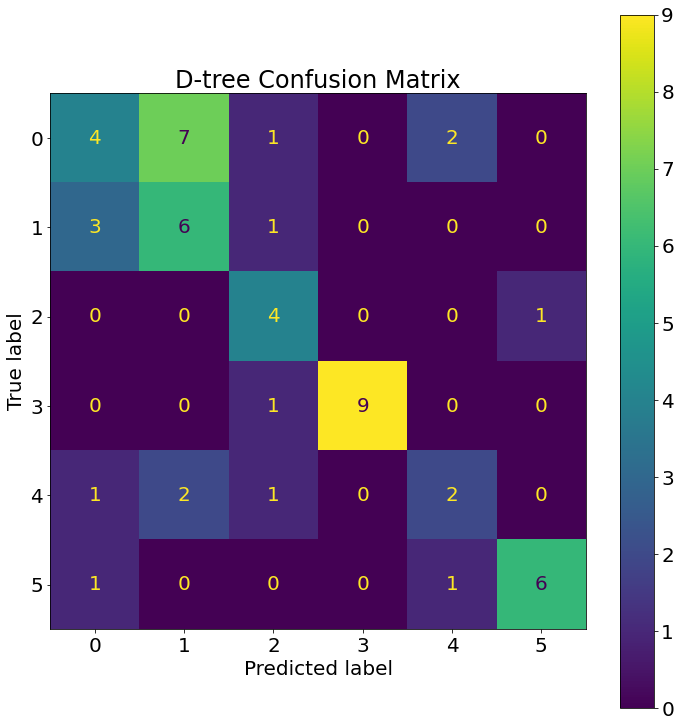

In [93]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix(Ytest , predictions))
disp.plot()
disp.figure_.set_size_inches(10.5, 10.5)
disp.figure_.tight_layout()
# disp.ax_.set(annot_kws={"fontsize":8})
# disp.ax_.set(font_scale=2)
# print(disp.text_.fontsize(12))
# print(disp.im_)
plt.rcParams.update({'font.size': 20})
# print(disp.ax_.text(fontsize=12))
disp.ax_.set_title('D-tree Confusion Matrix')
# plot_confusion_matrix(knn, X_test, y_test)
plt.savefig('D-tree_Conf_matrix.png')
plt.show()

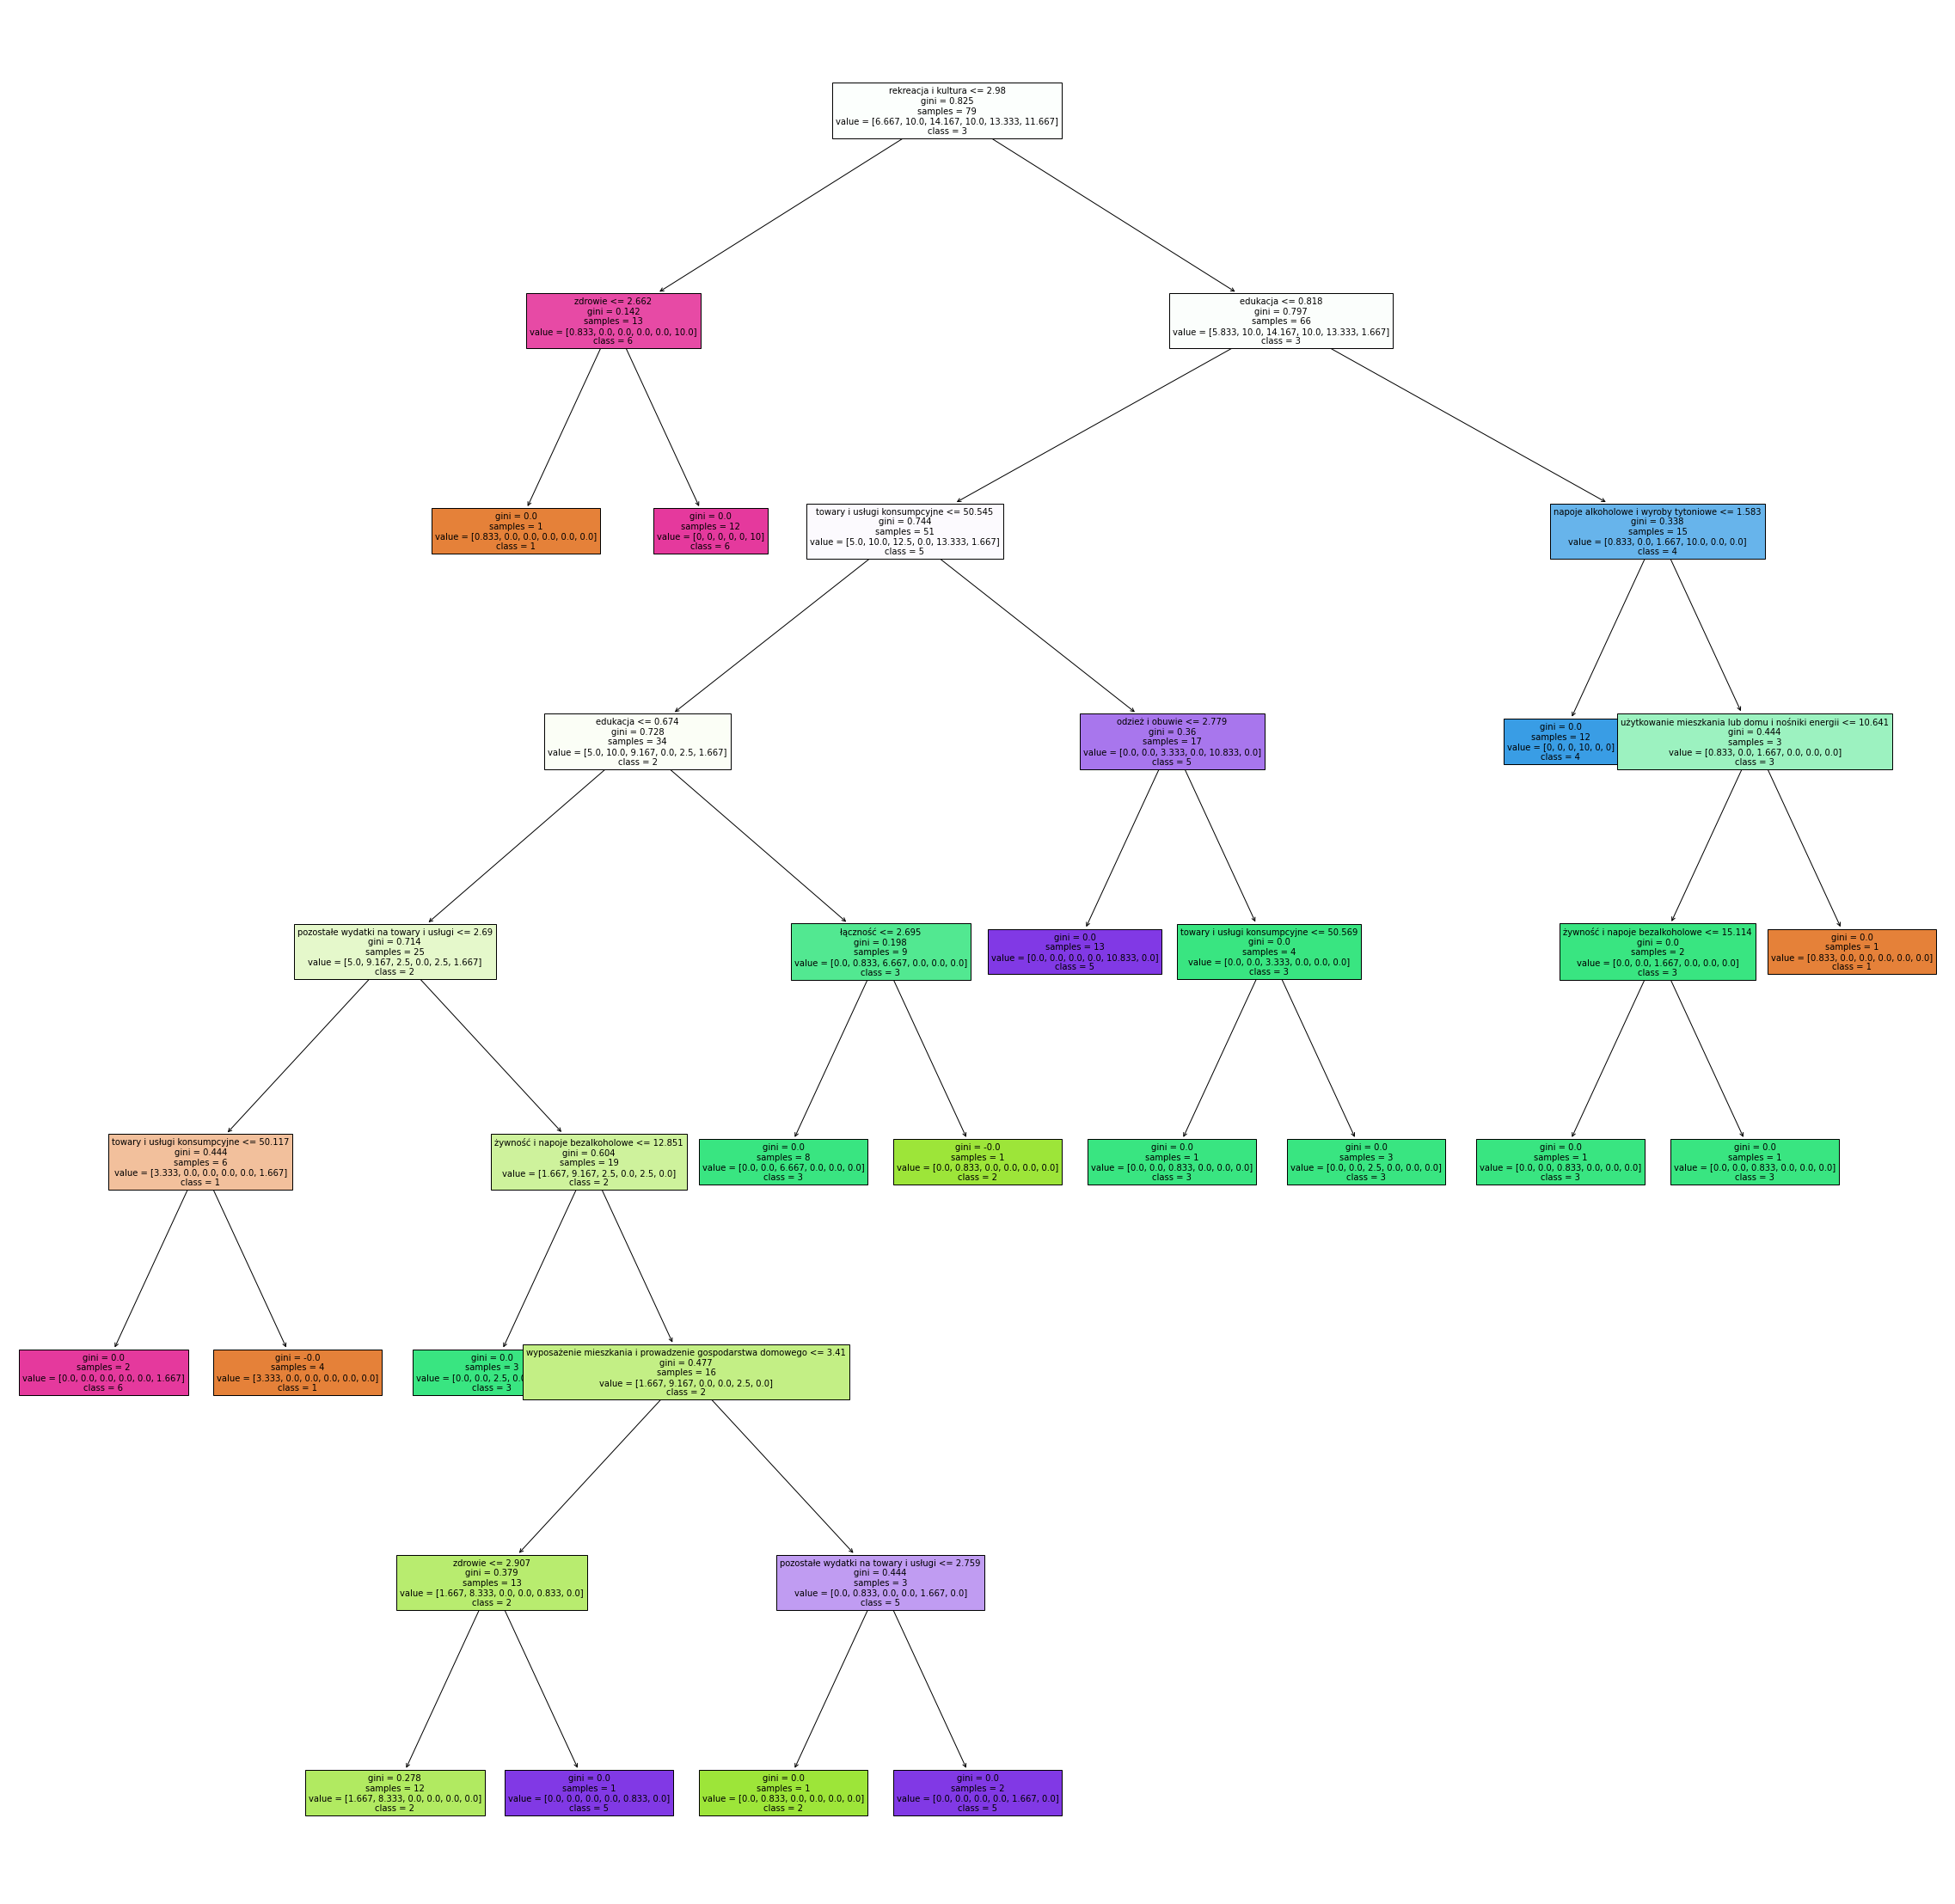

In [90]:
#plot decision tree
from sklearn import tree
fig, ax = plt.subplots()

fig.set_size_inches(40.5, 40.5)

# plt.figure(figsize=(25,20))
tree.plot_tree(model,
                   max_depth=8,
                   feature_names=df.columns[:-1],  
                   class_names=['1','2','3','4','5','6'],
                   filled=True,ax=ax,fontsize=10)
# fig.tight_layout()
plt.savefig('decision_tree_plot.png',dpi=150)
plt.show()